In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Define the column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

# Read the CSV file with proper path and column names
df = pd.read_csv(r'F:\adult.data', names=column_names)

# Ensure the column names are correctly set
df.columns = column_names


In [81]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
print(df)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [85]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [86]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Apply Min-Max scaling to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [87]:
print(df)

            age  workclass    fnlwgt  education  education-num  \
0      0.301370          7  0.044302          9       0.800000   
1      0.452055          6  0.048238          9       0.800000   
2      0.287671          4  0.138113         11       0.533333   
3      0.493151          4  0.151068          1       0.400000   
4      0.150685          4  0.221488          9       0.800000   
...         ...        ...       ...        ...            ...   
32556  0.136986          4  0.166404          7       0.733333   
32557  0.315068          4  0.096500         11       0.533333   
32558  0.561644          4  0.094827         11       0.533333   
32559  0.068493          4  0.128499         11       0.533333   
32560  0.479452          5  0.187203         11       0.533333   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           1             1     4    1      0.021740   
1                   2           4             0     4  

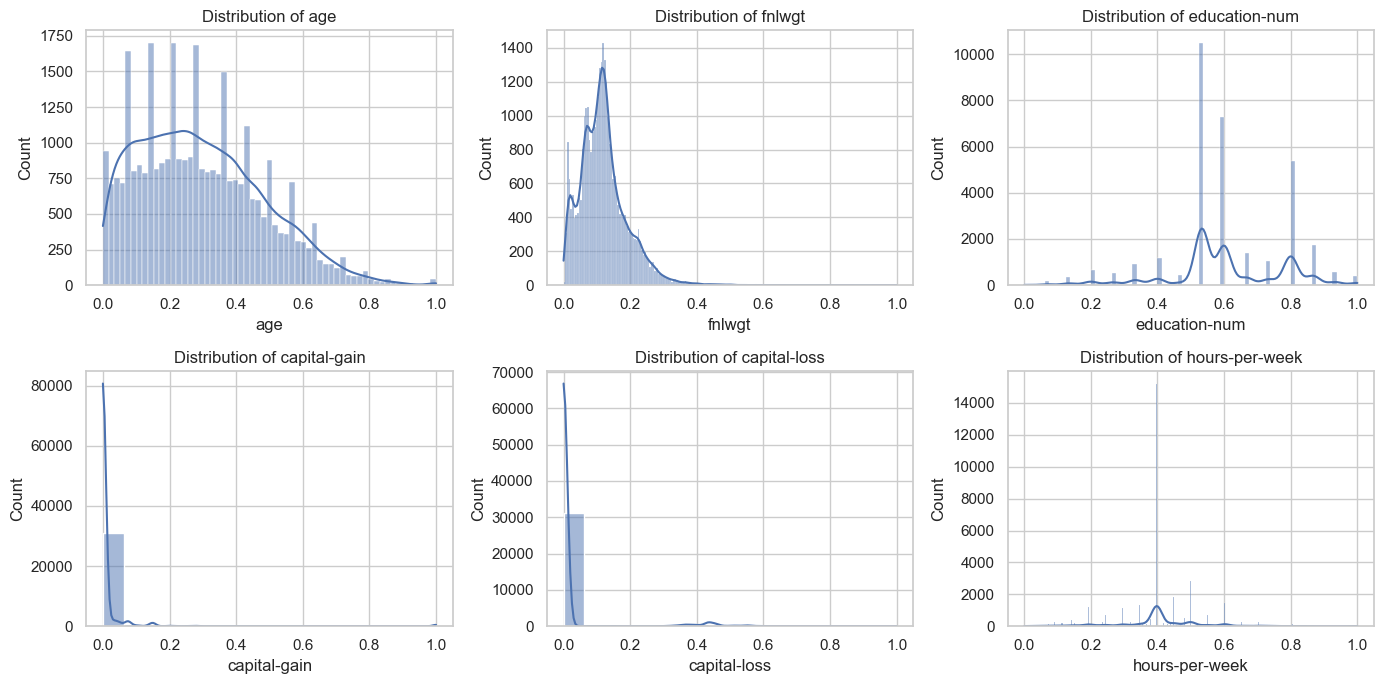

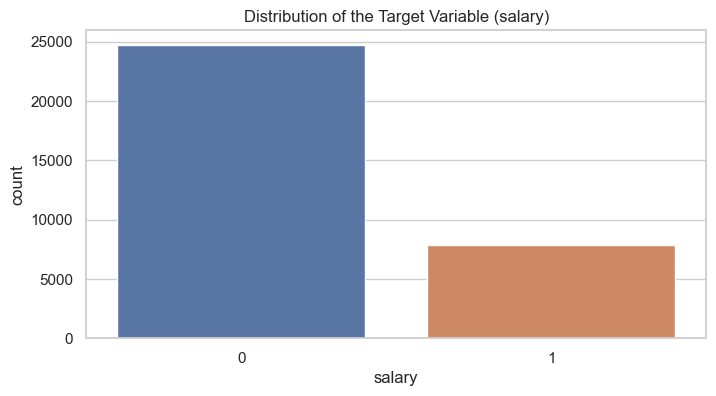

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='salary')
plt.title('Distribution of the Target Variable (salary)')
plt.show()


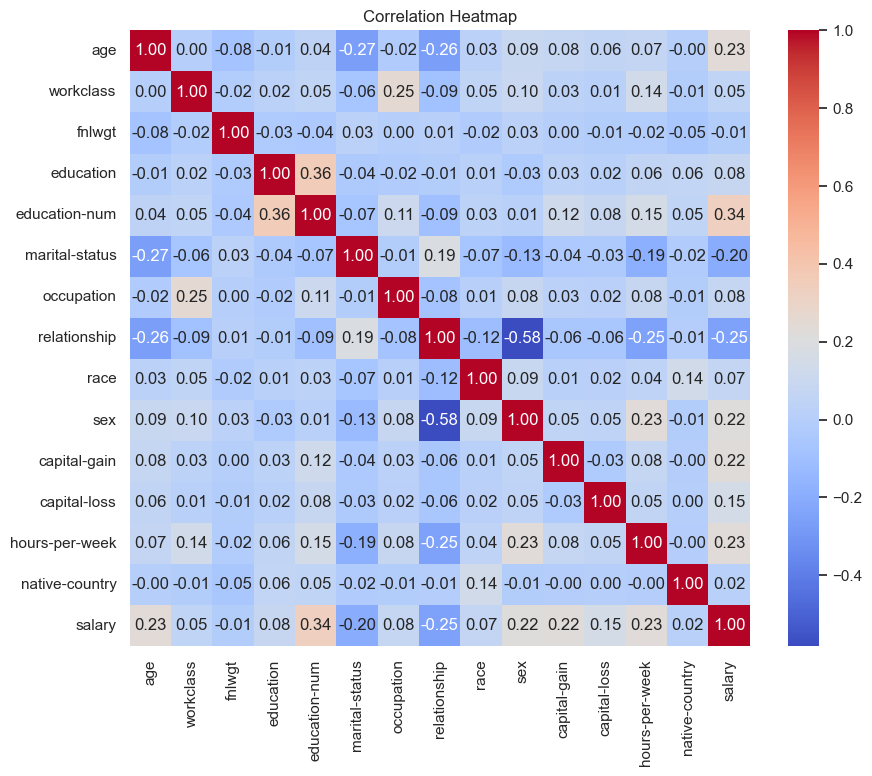

In [89]:
corr_matrix = df.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [90]:
X = df.drop(columns=['salary'])
y = df['salary']

In [91]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

# Read the CSV file with proper path and column names
df1 = pd.read_csv(r'F:\adult.test', names=column_names)

# Ensure the column names are correctly set
df1.columns = column_names


In [92]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])


In [93]:
    
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Apply Min-Max scaling to the selected columns
df1[columns_to_normalize] = scaler.fit_transform(df1[columns_to_normalize])


In [94]:
print(df1)

            age  workclass    fnlwgt  education  education-num  \
0      0.109589          4  0.144430          1       0.400000   
1      0.287671          4  0.051677         11       0.533333   
2      0.150685          2  0.219011          7       0.733333   
3      0.369863          4  0.099418         15       0.600000   
4      0.013699          0  0.060942         15       0.600000   
...         ...        ...       ...        ...            ...   
16276  0.301370          4  0.136723          9       0.800000   
16277  0.643836          0  0.208484         11       0.533333   
16278  0.287671          4  0.244762          9       0.800000   
16279  0.369863          4  0.047666          9       0.800000   
16280  0.246575          5  0.114195          9       0.800000   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           7             3     2    1      0.000000   
1                   2           5             0     4  

In [95]:
X1 = df1.drop(columns=['salary'])
y1 = df1['salary']

In [96]:
'''scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
# Create and train the SVM classifier
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Make predictions
y_pred = clf.predict(X1)

# Evaluate the model
accuracy = accuracy_score(y1, y_pred)
report = classification_report(y1, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



C:\Users\balim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
